In [1]:
import pandas as pd
df = pd.read_csv("data/HR_comma_sep.csv")
display(df.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
cdf = df.copy()
print(set(df.Department.values))
cdf = pd.concat([cdf, pd.get_dummies(cdf.salary, prefix="salary")], axis='columns').drop("salary", axis='columns')
cdf = pd.concat([cdf, pd.get_dummies(cdf.Department, prefix="department")], axis='columns').drop("Department", axis='columns')
display(cdf)

{'management', 'hr', 'product_mng', 'support', 'IT', 'sales', 'marketing', 'technical', 'RandD', 'accounting'}


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


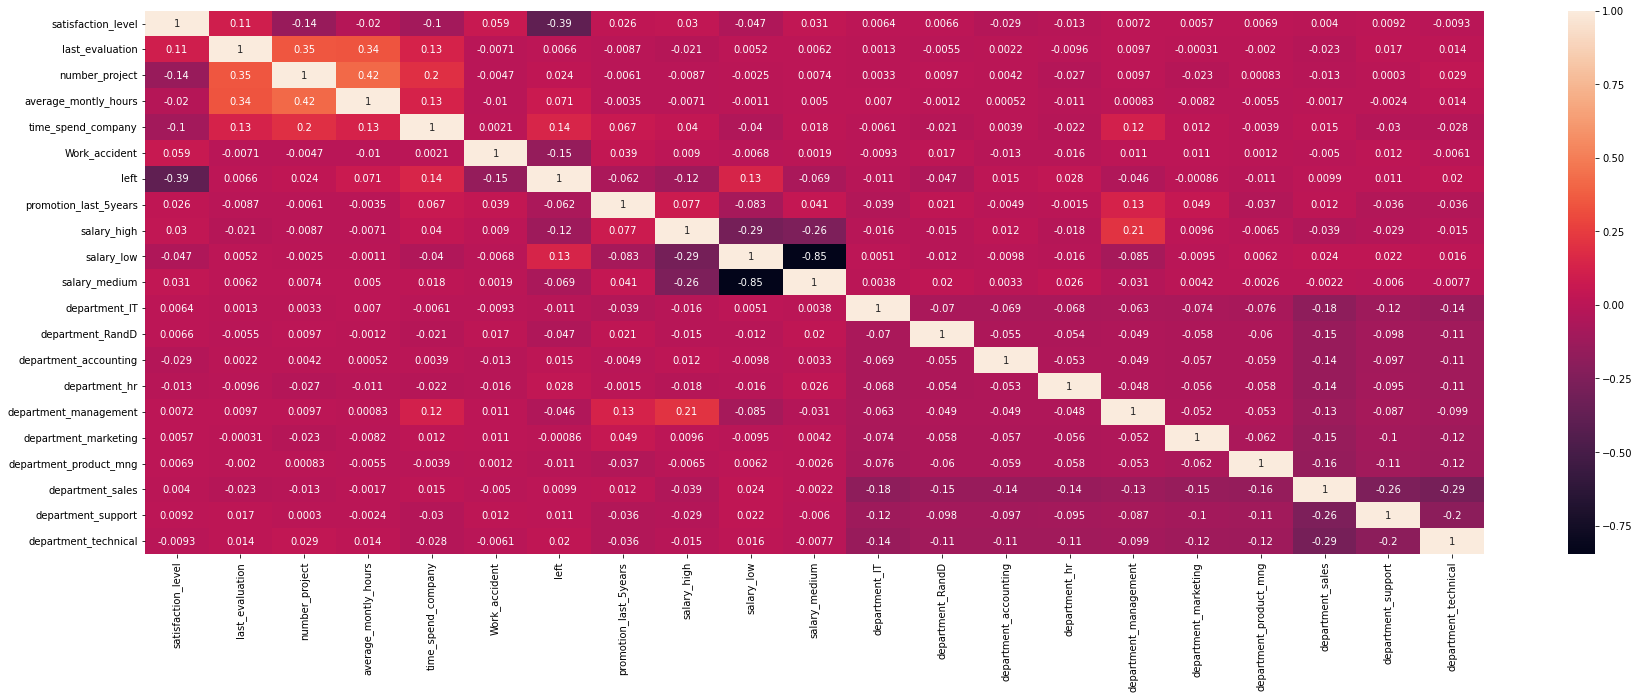

left                      1.000000
satisfaction_level        0.388375
Work_accident             0.154622
time_spend_company        0.144822
salary_low                0.134722
salary_high               0.120929
average_montly_hours      0.071287
salary_medium             0.068833
promotion_last_5years     0.061788
department_RandD          0.046596
department_management     0.046035
department_hr             0.028249
number_project            0.023787
department_technical      0.020076
department_accounting     0.015201
department_product_mng    0.011029
department_IT             0.010925
department_support        0.010700
department_sales          0.009923
last_evaluation           0.006567
department_marketing      0.000859
Name: left, dtype: float64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.rcParams['figure.figsize'] = [30, 10]
corr_matrix = cdf.corr()
left_corr = corr_matrix.loc["left", :].abs().sort_values(ascending=False)
sn.heatmap(corr_matrix, annot=True)
plt.show()
display(left_corr)

# Conclusions based on correlations

As we can see above, there are some independent variables that do not have much impact in the employee retention:
 - Department
 - Last evaluation
 - Number of projects

The independent variables that have more impact on the employee rentention are:
 - Satisfaction level
 - Work accident
 - Time spend in company
 - Salary

The variables that are in no man's land are:
 - Average monthly hours
 - Promotion last 5 years

In [4]:
final = df.copy()

final.drop(["Department", "last_evaluation", "number_project", "promotion_last_5years", "average_montly_hours"], axis='columns', inplace=True)

final = pd.concat([final, pd.get_dummies(final.salary, prefix="salary")], axis='columns').drop("salary", axis='columns')
display(final)

,satisfaction_level,time_spend_company,Work_accident,left,salary_high,salary_low,salary_medium
0,0.38,3,0,1,0,1,0
1,0.80,6,0,1,0,0,1
2,0.11,4,0,1,0,0,1
3,0.72,5,0,1,0,1,0
4,0.37,3,0,1,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,3,0,1,0,1,0
14995,0.37,3,0,1,0,1,0
14996,0.37,3,0,1,0,1,0
14997,0.11,4,0,1,0,1,0


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(max_iter=1000)

X = final.drop("left", axis='columns')
y = final.left

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

model.fit(X_train, y_train)
print("Score", model.score(X_test, y_test))

Score 0.768
